Connected to base (Python 3.13.5)

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from textblob import TextBlob
import matplotlib.pyplot as plt

In [ ]:
url_list = pd.read_csv("sentiment_analysis_urls.csv")

In [ ]:
addresses = []
for address in url_list['URL']:
    addresses.append(address)

In [ ]:
polarities = []
subjectivities = []

In [ ]:
counter = 0

In [ ]:
# runs a loop for each url in the list of url addresses,
# which will import the address, parse its contents,
# run its contents through NLP processing for sentiment
# analysis, and append that sentiment data into the two
# preceding lists
for address in addresses:
    url = address
    page_code = requests.get(url)
    html_doc = page_code.text
    soup = BeautifulSoup(html_doc, "html.parser")
    page_text = BeautifulSoup.get_text(soup)
    # creates a blob object with TextBlob
    page_blob = TextBlob(page_text)
    # returns polarity score of page_blob (ranges between -1
    # and 1, with most negative being -1, most positive 
    # being 1, and 0 being neutral)
    page_polarity = page_blob.sentiment.polarity 
    # appends polarity score of the page to the polarities list
    polarities.append(page_polarity)
    # returns subjectivity score of the page (where 0.0 is
    # very objective, and 1.0 is very subjective)
    page_subjectivity = page_blob.sentiment.subjectivity
    # appends subjectivity score of the page to the subjectivities list
    subjectivities.append(page_subjectivity)
    counter += 1
    # prompts user for input, to not overload the archive.org web server being requested
    print(counter, "of 21 web pages processed.")
    input('please hit "Enter" to process the next web page')

1 of 21 web pages processed.
2 of 21 web pages processed.
3 of 21 web pages processed.
4 of 21 web pages processed.
5 of 21 web pages processed.
6 of 21 web pages processed.
7 of 21 web pages processed.
8 of 21 web pages processed.
9 of 21 web pages processed.
10 of 21 web pages processed.
11 of 21 web pages processed.
12 of 21 web pages processed.
13 of 21 web pages processed.
14 of 21 web pages processed.
15 of 21 web pages processed.
16 of 21 web pages processed.
17 of 21 web pages processed.
18 of 21 web pages processed.
19 of 21 web pages processed.
20 of 21 web pages processed.
21 of 21 web pages processed.
22 of 21 web pages processed.


In [ ]:
# renames url_list DataFrame to be clearer as to what it is
url_list_sentiments_df = url_list




In [ ]:
# creates two new columns in the url_list DataFrame, adding a column each
# for polarity scores and subjectivity scores
url_list_sentiments_df['Polarity Score'] = polarities
url_list_sentiments_df['Subjectivity Score'] = subjectivities

In [ ]:
# creates a new DataFrame and modifies it to be ready to plot as a 
# line graph
url_list_sentiments_to_plot_df = url_list_sentiments_df
del url_list_sentiments_to_plot_df['URL']
url_list_sentiments_to_plot_df.set_index('Date')

,Polarity Score,Subjectivity Score
Date,,
2015-01,0.110206,0.360222
2015-06,0.098208,0.363346
2016-01,0.082701,0.397980
2016-06,0.088563,0.394160
2017-01,0.100281,0.394081
2017-06,0.078540,0.385939
2018-01,0.050469,0.412877
2018-06,0.055408,0.414210
2019-01,0.046146,0.432622


<Axes: title={'center': "Polarity and Subjectivity Score of Elon Musk's Wikipedia entry (2015-2025)"}, xlabel='Date (in six month increments)'>

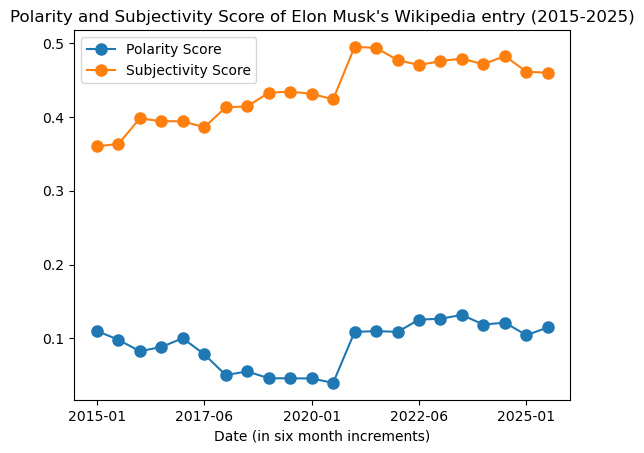

In [ ]:
# draws graph plotting the change in polarity and subjectivity scores
# on Elon Musk's Wikipedia page over the past 10 years
url_list_sentiments_to_plot_df.plot(kind='line', x='Date', xlabel = 'Date (in six month increments)', title="Polarity and Subjectivity Score of Elon Musk's Wikipedia entry (2015-2025)", marker='o', markersize=8)